# Distribution Plots

Let's discuss some plots that allow us to visualize the distribution of a data set. These plots are:

* distplot
* jointplot
* pairplot
* rugplot
* kdeplot

## Imports

In [6]:
import seaborn as sns
%matplotlib inline 

### Data

Seabirn comes with built-in data sets!

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**Dist Plot**

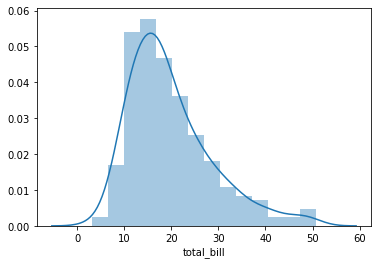

In [8]:
sns.distplot(tips['total_bill'])

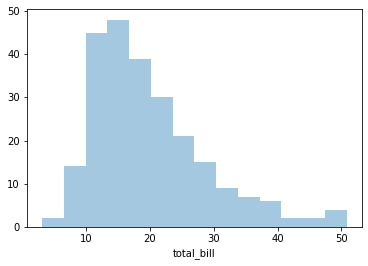

In [9]:
# to remove the line
sns.distplot(tips['total_bill'], kde=False)

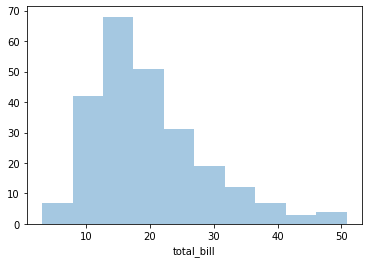

In [15]:
#to add bins
sns.distplot(tips['total_bill'], kde=False,bins = 10)

**Joint Plot**

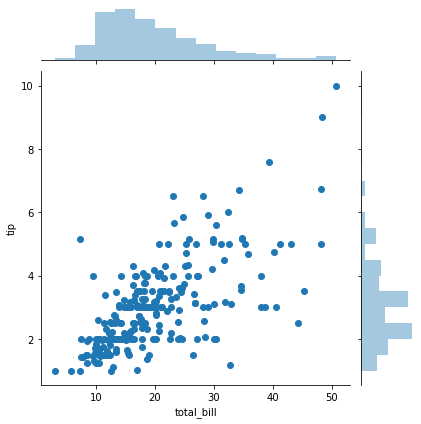

In [17]:
#combine 2 hist plot with two variables
sns.jointplot(x = 'total_bill', y ='tip',data=tips)

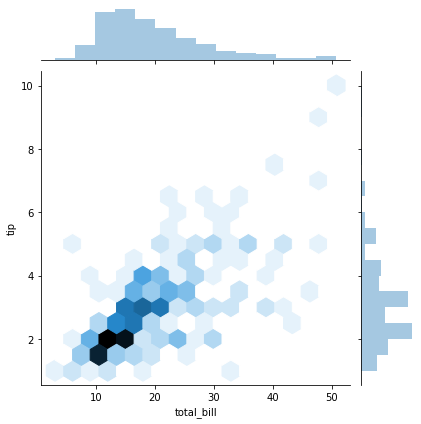

In [18]:
sns.jointplot(x = 'total_bill', y ='tip',data=tips, kind = 'hex')

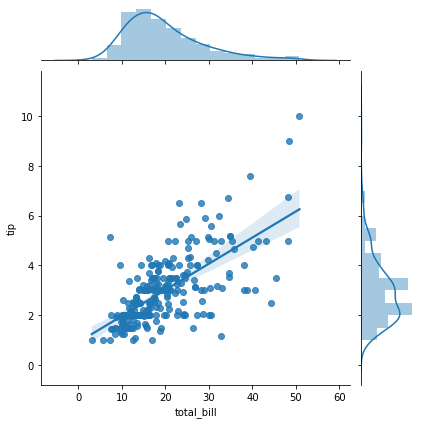

In [19]:
sns.jointplot(x = 'total_bill', y ='tip',data=tips, kind = 'reg')

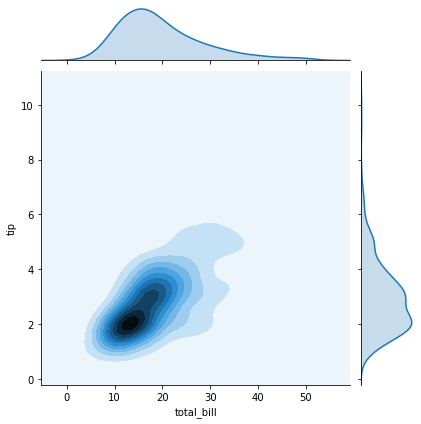

In [20]:
sns.jointplot(x = 'total_bill', y ='tip',data=tips, kind = 'kde')

**Pair Plot**
Plot pairwise relationship across an entire data frame at least for the numerical columns. 

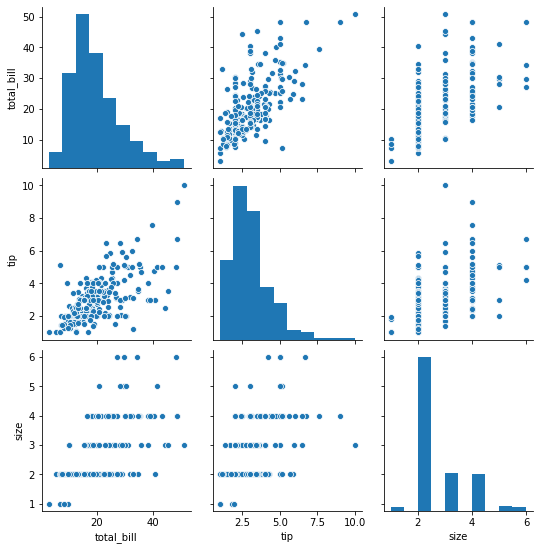

In [21]:
sns.pairplot(tips)

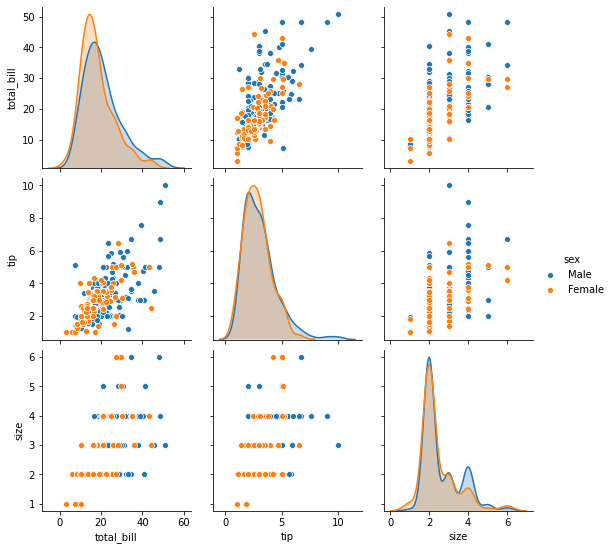

In [22]:
sns.pairplot(tips, hue = 'sex') #hue is used to present categorical information

**Rug Plots**

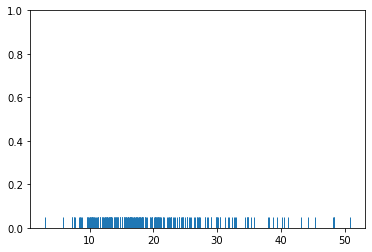

In [24]:
sns.rugplot(tips['total_bill']) #Show univariate distribution

**KDE Plot**

kdeplots are Kernel Density Estimation plots. These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example:

(0.0, 1.0)

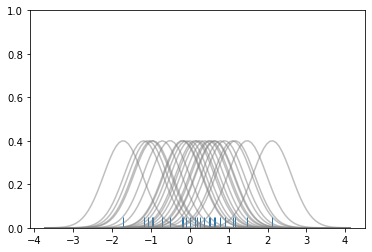

In [25]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

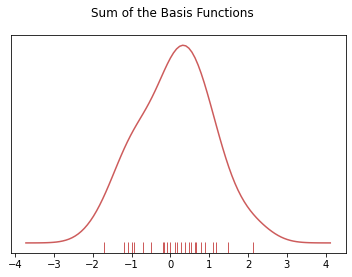

In [26]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

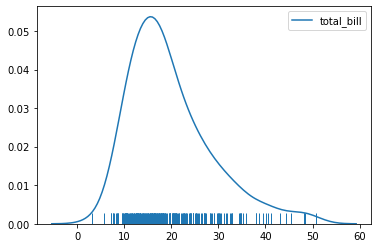

In [27]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

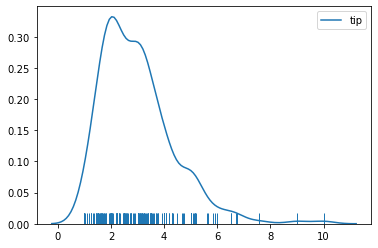

In [28]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])

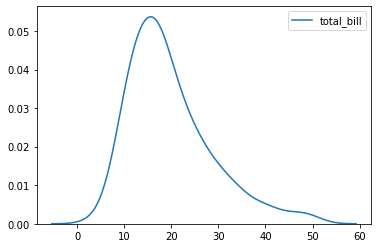

In [29]:
sns.kdeplot(tips['total_bill'])